In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import generative_model
import plot
import emcee
import timeit

In [3]:
model = generative_model.GenerativeModel()

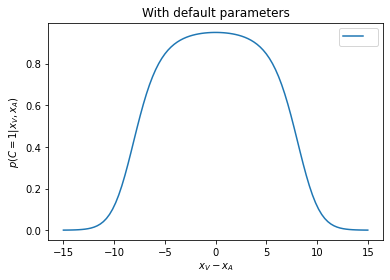

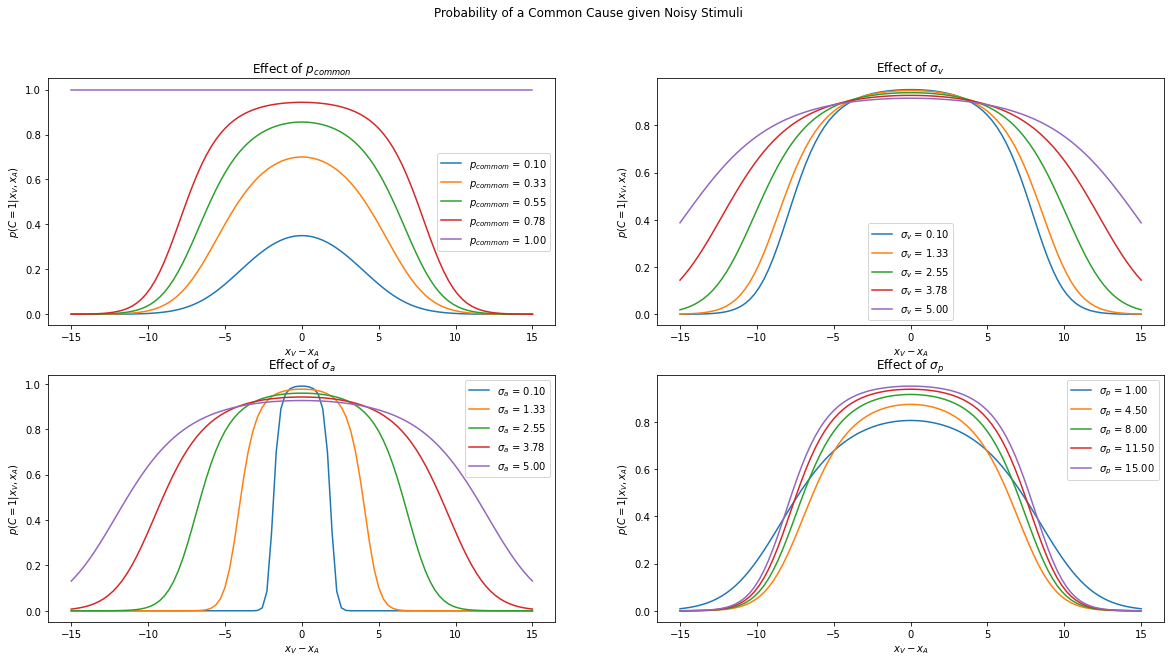

In [4]:
x_v, x_a = np.linspace(-15, 15, 100), 0

plot.plot_figure(x_v-x_a, model.probability_cause(x_v, x_a), '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='With default parameters')
plot.plot_probability_varying_parameters(x_v, x_a, model.probability_cause, '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='Probability of a Common Cause given Noisy Stimuli')

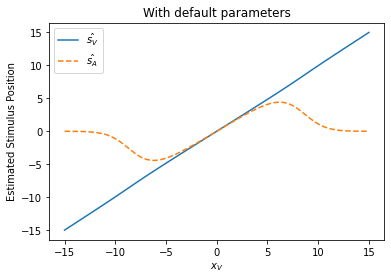

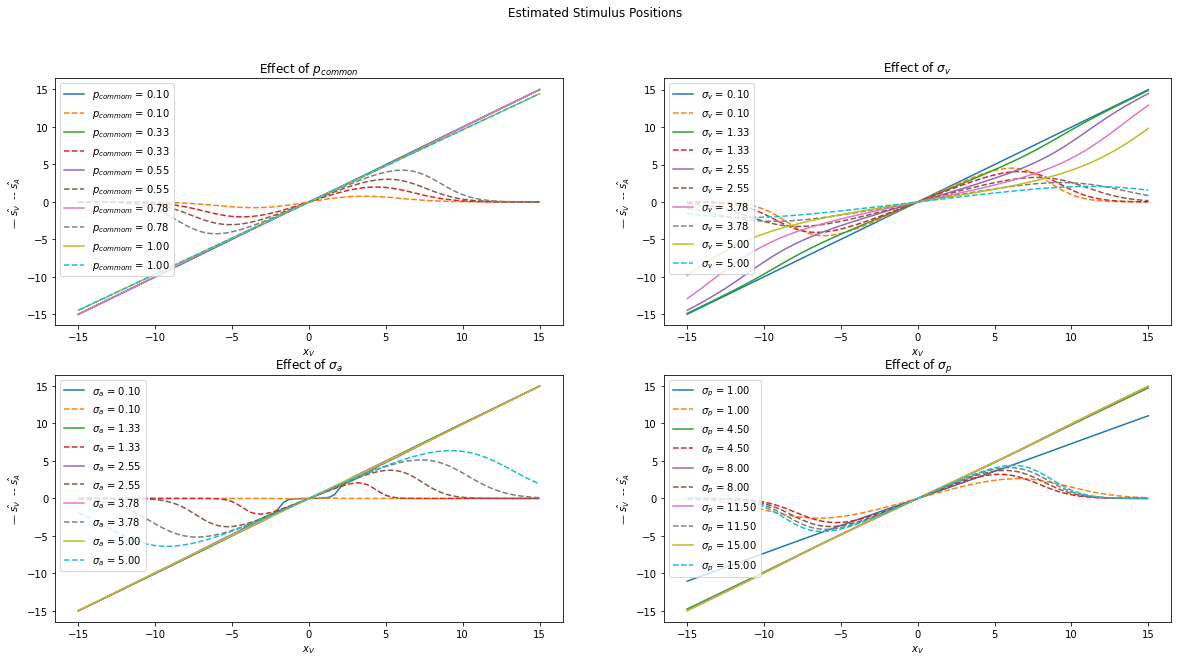

In [5]:
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='video'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_V}$', title='With default parameters')
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='audio'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_A}$', title='With default parameters', fmt='--')

plot.plot_estimate_stimulus_position(x_v, x_a, model.estimate_signal, '$x_V$', '— $\hat{s_V}$  -- $\hat{s_A}$', title='Estimated Stimulus Positions')

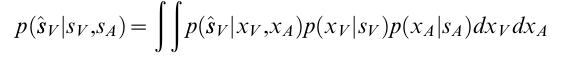

p($\hat{s_V}$|x_V, x_A) is gaussian (think of bayes rule formula).  Hence, the integral is also gaussian (product of gaussians), and hence can be parameterised for analytic evaluation.

In [ ]:
#TODO: heatmap for 1.f.

In [6]:
trials = int(1e4)
stimulus_pairs, _ = model.generate_stimulus_pairs(trials)

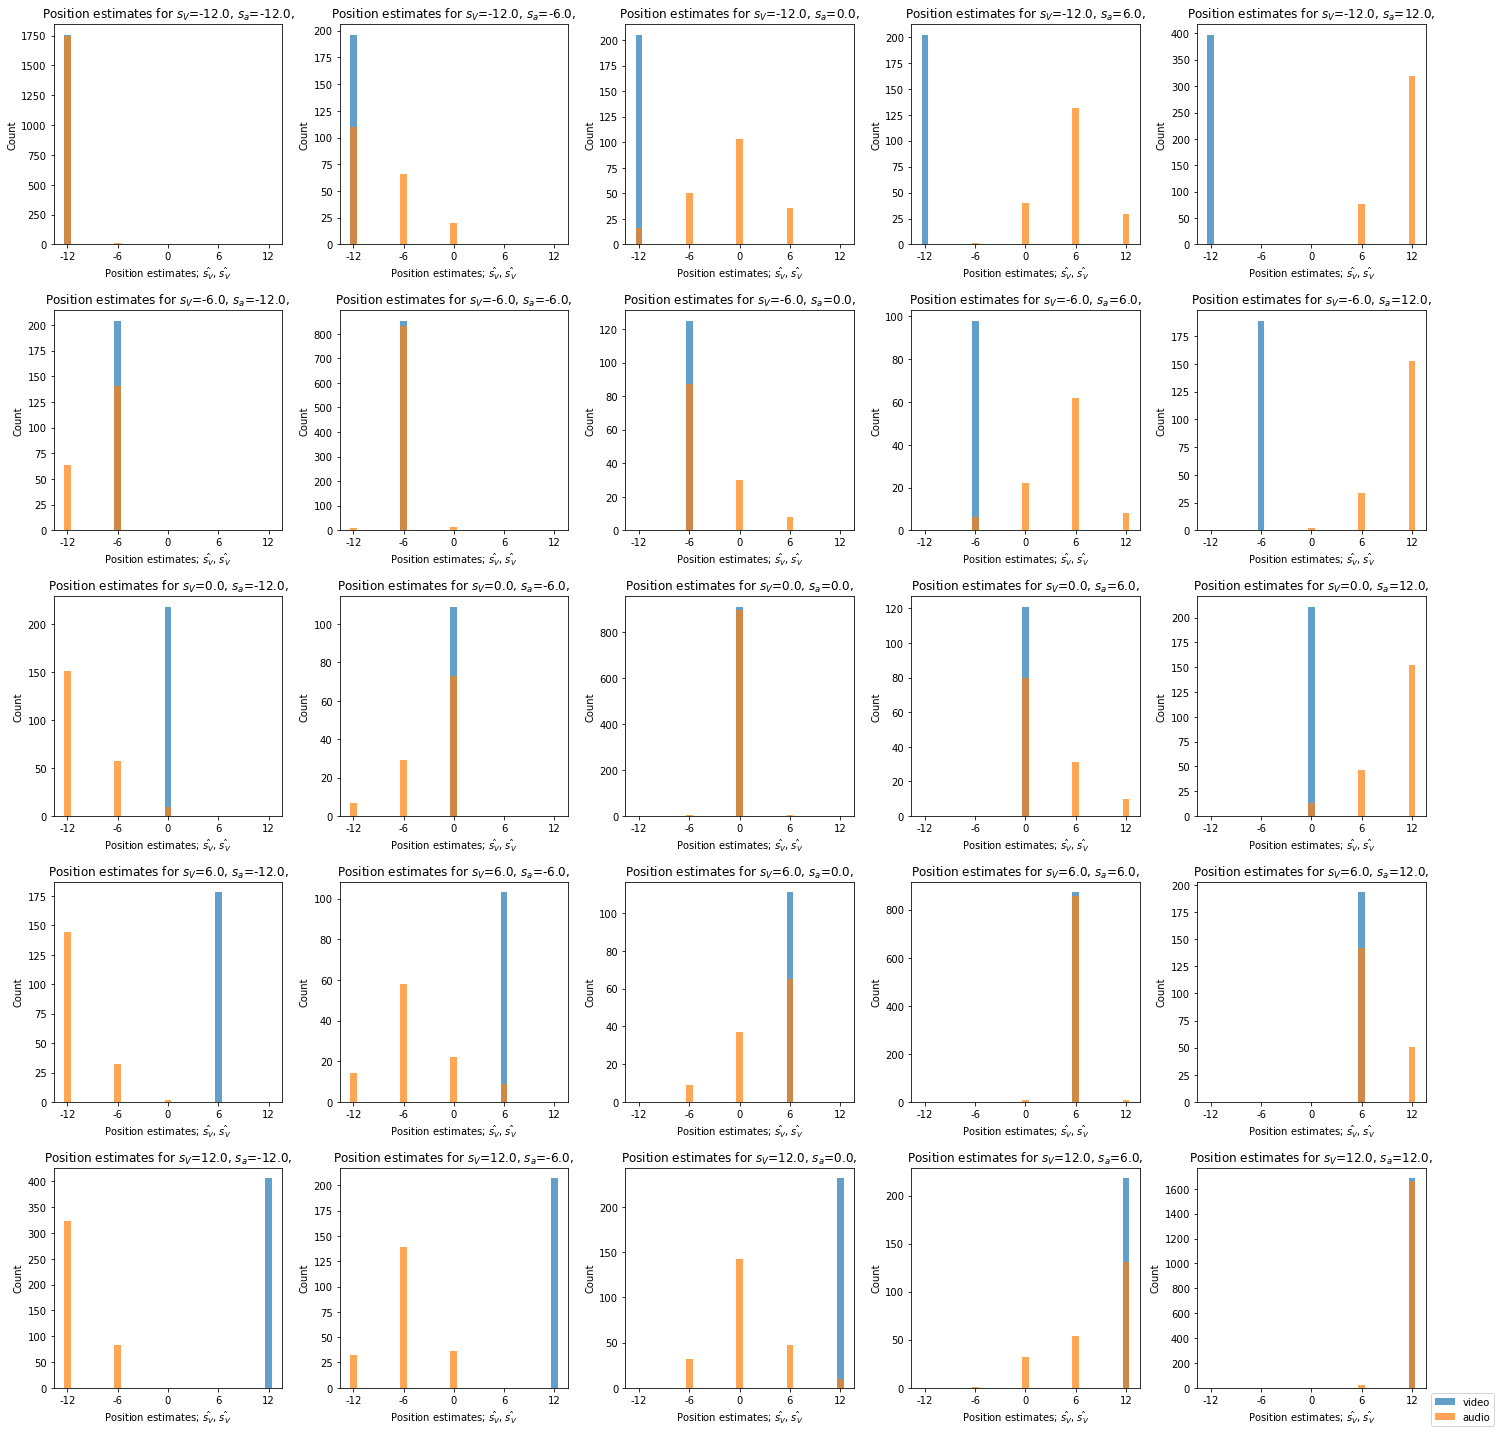

In [7]:
s_hat_v_hist, s_hat_a_hist = model.make_button_presses(stimulus_pairs, plot=True)

In [32]:
# sigma_p = 15
model.log_likelihood(s_hat_v_hist, s_hat_a_hist)

-3.172317821884408

In [36]:
# testing function with different parameters
model.log_likelihood(p_commom=0.5, sigma_v=0.1, sigma_a=2, sigma_p=2)

-1.0741128261848583

Using 10 times the number of trials makes the probabilities more precise as we now have more data, and hence gives a better estimate of the log likelihood.

NaN and infinity in calculation of log likelihood as log(0) is undefined.The manifold is hence convex in the parameter space and has a global minimim, therefore gradient-based sampling methods can be used fit the model.
Adding a small epsilon ensures that the logarithm doesn't return NaN and infinity.

In [ ]:
likelihoods, parameters = model.brute_fitting()

1.9999900000797683e-05
-1.244812852996174
-2.403366084695954
-2.9735632154517417
-3.180267918387018
-3.212962760266721
-3.1825660863482685
-3.115511974803898
-3.0320133231934143
-2.952062592571026
-0.461136478829527
-1.3833582355617233
-2.3772183473764366
-2.885580793085926
-3.1275945869477453
-3.1956987295550556


In [ ]:
# 2.g
## Needs a couple of adjustements yet to perform the MCMC